# Spam Detection Project

 - This project involves building a spam detection model using machine learning and natural language processing (NLP) techniques. The following steps are taken to achieve this:


## Importing Libraries and Loading the Data
Imported all necessary libraries required for data processing, analysis, and model building.


In [15]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

In [113]:
# Load the dataset using pandas
df = pd.read_csv('spam.csv', encoding='latin1')

# Display the first few rows of the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

We clean the dataset by:
- Removing unnecessary columns
- Renaming columns for better understanding
- Encoding the target variable (ham/spam)
- Removing duplicates


In [16]:
# Checking the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# Print column names
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [20]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns_to_drop, axis=1, inplace=True)


In [21]:
# Rename columns for better understanding
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Encode the target variable (ham/spam)
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])


In [80]:
# Check for missing values
df.isnull().sum()

target              0
text                0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [81]:
# Drop duplicate rows
df = df.drop_duplicates(keep='first')


In [82]:
# Check for duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)
 We perform EDA to understand the distribution of data and the characteristics of spam and ham messages. This includes:
- Counting the number of spam and ham messages
- Visualizing the distribution using pie charts and histograms
- Creating new features like the number of characters, words, and sentences


In [83]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

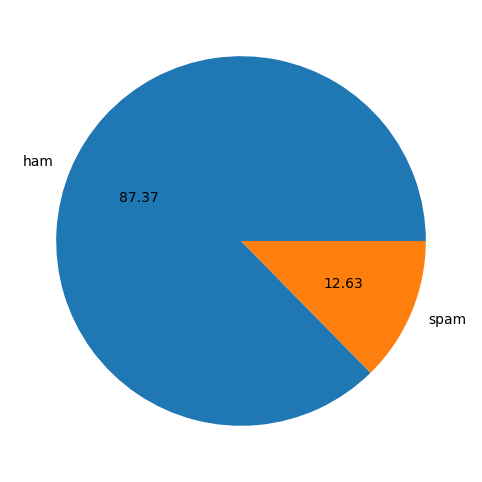

In [85]:
# Plotting the distribution
plt.figure(figsize=(8,6))
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

### Feature Engineering

In [86]:
# Adding new feature columns
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [87]:
# Descriptive statistics
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
# Separate statistics for ham and spam
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


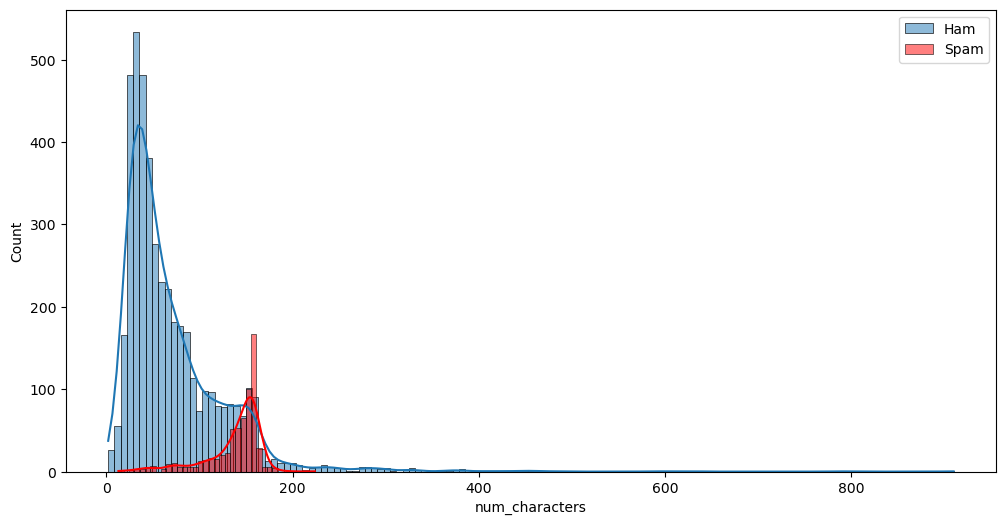

In [89]:
# Visualizations
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam', kde=True)
plt.legend()
plt.show()

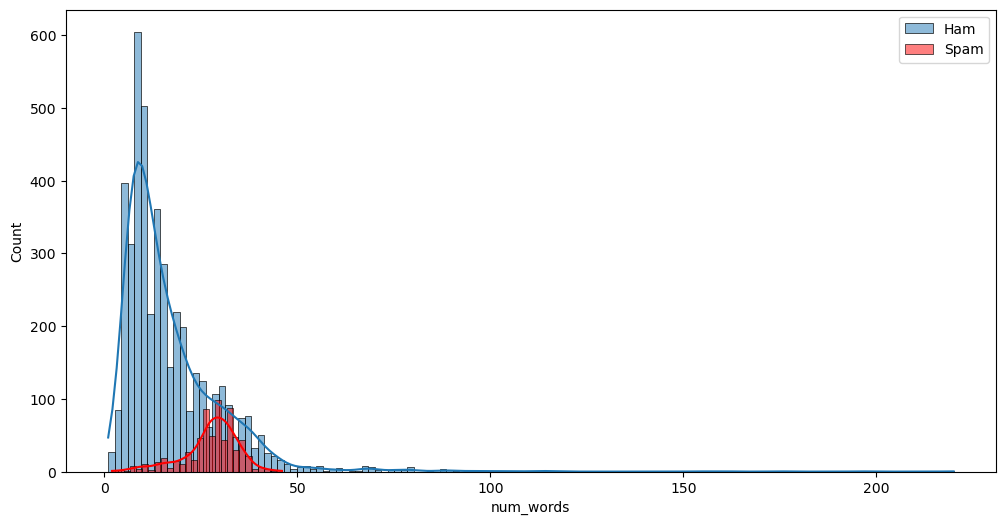

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam', kde=True)
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


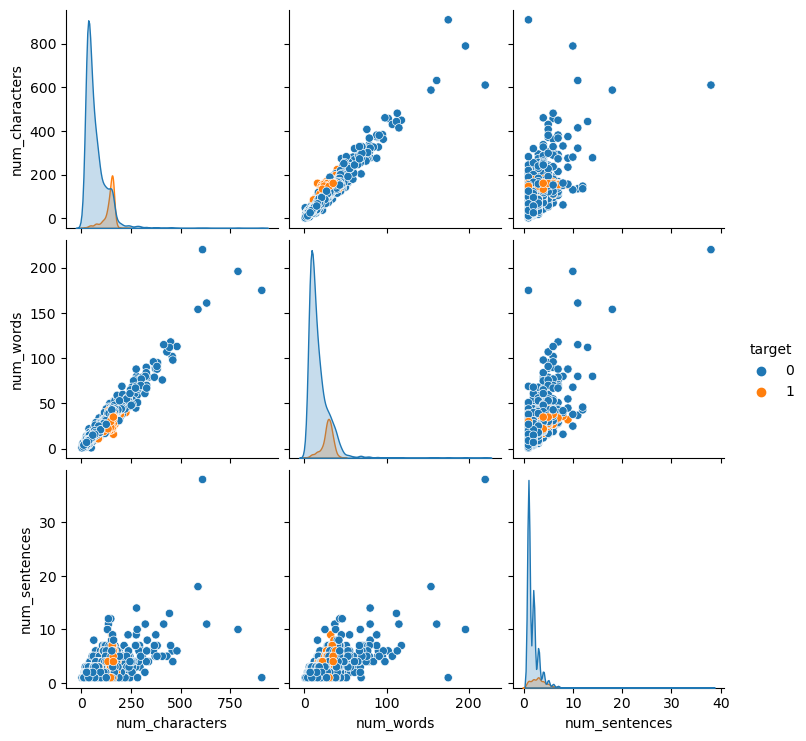

In [92]:
# Pairplot
sns.pairplot(df, hue='target')
plt.show()

## Data Preprocessing
We preprocess the text data by:
- Converting text to lower case
- Tokenizing the text
- Removing special characters, stop words, and punctuation
- Stemming the words


In [93]:
# Initialize the PorterStemmer
ps = PorterStemmer()

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [95]:
# Apply the transformation to the text column
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word Cloud Visualization
 We generate word clouds to visualize the most frequent words in spam and ham messages.


In [96]:
# Generate word clouds
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


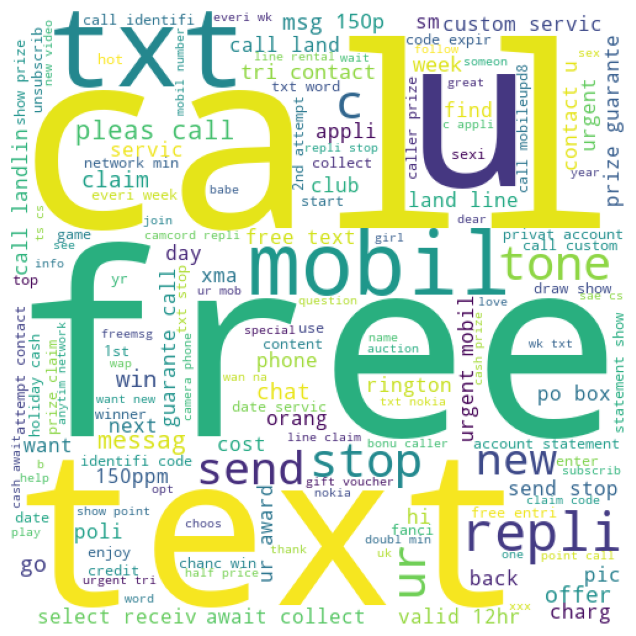

In [102]:
# Generate word clouds for spam and ham messages
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(spam_wc)



(-0.5, 499.5, 499.5, -0.5)

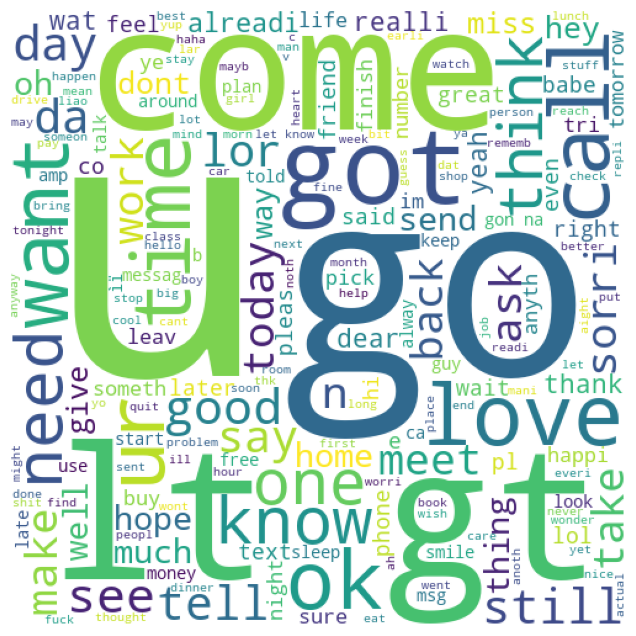

In [104]:
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.axis("off")

### Text Vectorization
We use TF-IDF to convert the text data into numerical vectors.


In [105]:
## Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [106]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


##  Model Building
Trained a Naive Bayes model and evaluated its performance using accuracy score, classification report, and confusion matrix.

In [107]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()

In [108]:
# Predict on the test set
y_pred = mnb.predict(X_test)

In [109]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy Score: ", accuracy)
print(classification_report(y_test, y_pred))

Model Accuracy Score:  0.9709864603481625
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [110]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

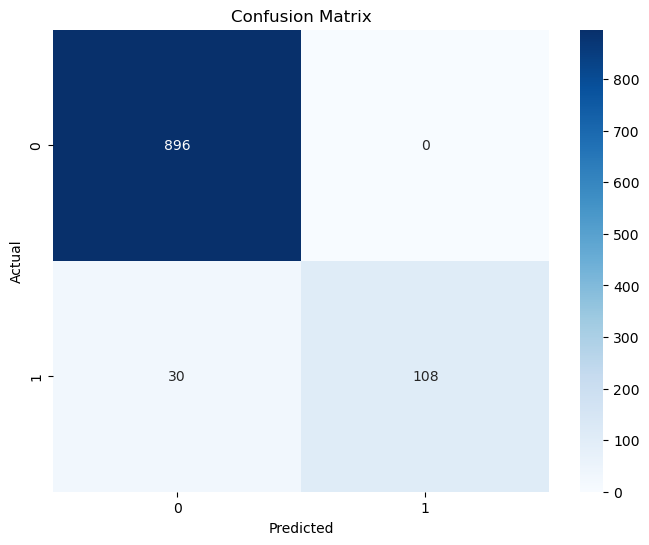

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [112]:
## Saving the Model and Vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))